In [1]:
!pip install datadotworld
!pip install datadotworld[pandas]

     |████████████████████████████████| 163kB 5.0MB/s 
     |████████████████████████████████| 92kB 9.5MB/s 
     |████████████████████████████████| 71kB 8.3MB/s 
     |████████████████████████████████| 71kB 7.7MB/s 
     |████████████████████████████████| 71kB 7.2MB/s 
     |████████████████████████████████| 245kB 15.4MB/s 
     |████████████████████████████████| 71kB 6.8MB/s 
     |████████████████████████████████| 174kB 15.9MB/s 
     |████████████████████████████████| 51kB 5.4MB/s 
  Created wheel for unicodecsv: filename=unicodecsv-0.14.1-cp36-none-any.whl size=10768 sha256=5dcac62c30047f54b614d9fa390a1d504844f474ce4522d15f4fb676142671a1
  Stored in directory: /root/.cache/pip/wheels/a6/09/e9/e800279c98a0a8c94543f3de6c8a562f60e51363ed26e71283
  Created wheel for openpyxl: filename=openpyxl-3.0.3-py2.py3-none-any.whl size=241262 sha256=b429522c1e7471734e18f1cae48772de74151a2834aede48e8c5aba25f7a0a20
  Stored in directory: /root/.cache/pip/wheels/b5/85/ca/e768ac132e57e75e645a151f8ba

In [0]:
from google.colab import drive
import pandas as pd
import numpy as np

In [0]:
#!dw configure

In [0]:
import datadotworld as dw

In [0]:
#drive.mount("/content/drive")

In [7]:
cd "drive/My Drive/Colab Notebooks"

/content/drive/My Drive/Colab Notebooks


In [8]:
cd data_workshop/

/content/drive/My Drive/Colab Notebooks/data_workshop


In [0]:
data = dw.load_dataset('https://data.world/datafiniti/mens-shoe-prices')

In [10]:
data.dataframes


LazyLoadedDict({'7004_1': LazyLoadedValue(<pandas.DataFrame>)})

In [11]:
df = data.dataframes['7004_1']

/usr/local/lib/python3.6/dist-packages/datadotworld/models/dataset.py:209: UserWarning: Unable to set data frame dtypes automatically using 7004_1 schema. Data types may need to be adjusted manually. Error: Integer column has NA values in column 10
  'Error: {}'.format(resource_name, e))
/usr/local/lib/python3.6/dist-packages/datadotworld/util.py:121: DtypeWarning: Columns (39,45) have mixed types. Specify dtype option on import or set low_memory=False.
  return self._loader_func()


In [12]:
df.shape

(19387, 48)

In [0]:
df_usd = df[df.prices_currency == 'USD'].copy()

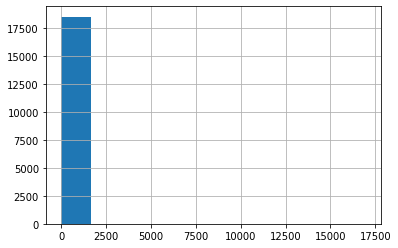

In [14]:
df_usd['prices_amountmin'] = df_usd.prices_amountmin.astype(np.float)
df_usd['prices_amountmin'].hist()

In [0]:
filter_max = np.percentile(df_usd['prices_amountmin'], 95)
df_usd_filter = df_usd[df_usd['prices_amountmin']<filter_max]

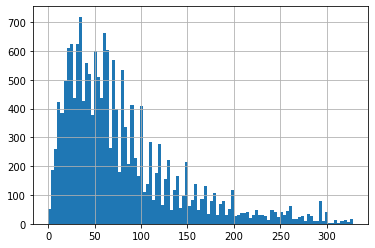

In [16]:
df_usd_filter.prices_amountmin.hist(bins=100)

In [0]:
df_usd_filter.to_csv('data/men_shoes.csv', index=False)

In [0]:
mkdir data

In [23]:
ls

data/  day3.ipynb  HelloGithub.ipynb  LICENSE  README.md


In [24]:
ls data

men_shoes.csv


In [26]:
!cat .gitignore

data


In [71]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

ImportError: ignored

In [28]:
y_true = 30
y_pred = 20

(10+8+15)/3

11.0

In [47]:
cd /content/drive/My\ Drive/

/content/drive/My Drive


In [48]:
cd Colab\ Notebooks

/content/drive/My Drive/Colab Notebooks


In [31]:
dir

<function dir>

In [49]:
ls

ColabDriveGithub.ipynb  data_workshop/  day4.ipynb


In [50]:
cd data_workshop/


/content/drive/My Drive/Colab Notebooks/data_workshop


In [0]:
df = pd.read_csv('data/men_shoes.csv', low_memory=False)

In [53]:
df.shape

(17597, 48)

In [54]:
mean_price = np.mean(df.prices_amountmin)
mean_price

79.12022106040277

In [42]:
[2, 3, 5] * 4

[2, 3, 5, 2, 3, 5, 2, 3, 5, 2, 3, 5]

In [55]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [0]:
y_true = df['prices_amountmin']
y_pred = [mean_price] * y_true.shape[0]

In [57]:
mean_absolute_error(y_true, y_pred)

47.05931578064369

In [61]:
df.brand.value_counts()

Nike                                  1687
PUMA                                   574
New Balance                            359
VANS                                   356
Ralph Lauren                           280
Reebok                                 275
adidas                                 198
Jordan                                 193
Superior Glove Works                   177
Fossa Apparel                          174
Fuse Lenses                            174
Converse                               151
SKECHERS                               149
Dickies                                144
Unbranded                              129
Unique Bargains                        127
Crocs                                  120
Berne Apparel                          116
TOMS                                   115
Kinco                                  110
National Safety Apparel Inc            103
Gameday Boots                          103
Under Armour                           100
Stacy Adams

In [62]:
df['brand'].factorize()

(array([  0,   0,   1, ..., 399, 399, 399]),
 Index(['Josmo', 'SERVUS BY HONEYWELL', 'NATIVE', 'MAUI AND SONS', 'Twisted X',
        'Lacoste', 'Rubies', 'unbranded', 'PUMA', 'Filament',
        ...
        'Bindi', 'Holloway Sportswear', 'River City', 'AH by Android Homme',
        'SEG', 'American Rag', 'BININBOX', 'HEAD', 'Swix', 'Xray, XRay'],
       dtype='object', length=1819))

In [0]:
df['brand_cat'] = df['brand'].factorize()[0]
df['manufacturer_cat'] = df['manufacturer'].factorize()[0]
df['name_cat'] = df['manufacturer'].factorize()[0]
df['merchant_cat'] = df['prices_merchant'].factorize()[0]


In [0]:

def run_model(feats):
  X = df[feats].values
  y = df['prices_amountmin'].values
  model = DecisionTreeRegressor(max_depth=5)
  scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
  return np.mean(scores), np.std(scores)

In [85]:
run_model(['brand_cat', 'manufacturer_cat'])

(-46.738478732535896, 1.17278716384932)

In [86]:
run_model(['brand_cat', 'manufacturer_cat', 'name_cat'])

(-46.73847873253591, 1.172787163849317)

In [90]:
run_model(['brand_cat', 'manufacturer_cat', 'name_cat', 'merchant_cat'])

(-45.822321945480454, 2.228857687103394)